In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy
from astropy import units as u
import astropy.io.fits as fits

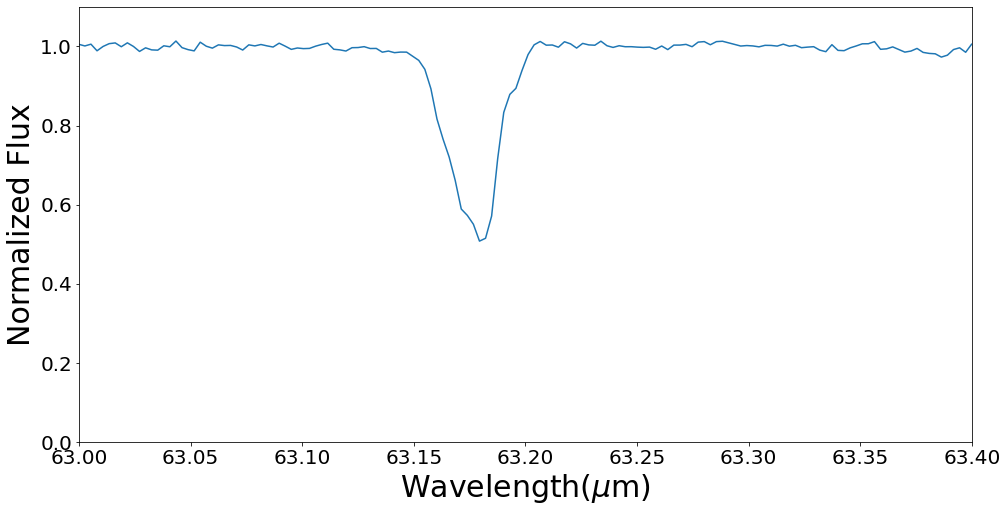

In [4]:
fits_table = 'B2_Full.fits'
hdul = fits.open(fits_table)
data = hdul[1].data
wavelength = data.field(0)
norm_flux = data.field(1)

plt.figure(0,figsize=(16,8))
ax = plt.subplot()
plt.plot(wavelength,norm_flux)
plt.xlim(63,63.4)
plt.ylim(0,1.1)
plt.xlabel("Wavelength($\mu$m)",fontsize=30)
plt.ylabel("Normalized Flux",fontsize=30)
ax.tick_params(axis = 'both',which = 'major',labelsize=20)

In [78]:
#equivalent length of line
c = 3e8
lambda_0 = 63.2e-6 #meters
normalized_flux = 0.5  #I/I0 (?)
dlambda = (63.21 - 63.15)*1e-6
nu_0 = c/(lambda_0) #Hz
dnu = c/dlambda
W = (1 - normalized_flux)*(1/nu_0)*dnu
print('Equivalent width (dimensionless)', ' ', W)
W_lambda = lambda_0 * W
print('Equivalent width (wavelength)', ' ', W_lambda, 'meters')

Equivalent width (dimensionless)   526.6666666666467
Equivalent width (wavelength)   0.03328533333333208 meters


In [43]:
#degeneracy of upper and lower levels of transition (Draine 4.5.1)
# g = 2J + 1
# 5 - 3 = 2 (for 3P2 to 3P1)
g_u = 5
g_l = 2

In [82]:
#Use above and Einstein A_ul = 8.46e-5 to find f_ul for the transition
m_e = 9.11e-31 # kg
e = 1.602e-19 # Coulombs
c = 3e8 # m/s
f_lu = ((g_u/g_l) * ((m_e * c**3)/(8*(np.pi**2) * e**2 * nu_0**2))) * 8.46e-5
f_lu #units of...okay.
#value should not be this large?

113.93821309602

In [81]:
#Calculate column density, assuming optically thin line, using Draine eq. 9.15
#Compare to value computed in literature for this data set: 3.1e19 cm^-2

N_l = (1.13e10) * (W/(f_lu * (lambda_0)))
N_l # m^-2
print(N_l, 'm^-2')

826471331328544.9 m^-2


In [63]:
flag = (wavelength > 63) & (wavelength < 63.5)

In [70]:
np.min(norm_flux[flag])

0.50761425

In [71]:
np.max(norm_flux[flag])

1.0166951